In [1]:
from clickhouse_driver.client import Client
from tqdm import tqdm
from datetime import datetime

In [2]:
client = Client('127.0.0.1')

In [3]:
limits = range(1, 10000000, 100000)

In [4]:
# With loop
from datetime import datetime

exce_time1 = []

for limit in tqdm(limits):
    progress = client.execute_with_progress("SELECT startsWith(DestCityName, 'aaaaaaaaaaa') FROM ontime ESC LIMIT {} FORMAT Null".format(limit))

    started_at = datetime.now()
    rv = progress.get_result()
    now = datetime.now()
    exce_time1.append((now - started_at).total_seconds())

100%|██████████| 100/100 [04:44<00:00,  2.85s/it]


In [6]:
# With StringRef::operator==
from datetime import datetime

exce_time2 = []

for limit in tqdm(limits):
    progress = client.execute_with_progress("SELECT startsWith(DestCityName, 'aaaaaaaaaaa') FROM ontime ESC LIMIT {} FORMAT Null".format(limit))

    started_at = datetime.now()
    rv = progress.get_result()
    now = datetime.now()
    exce_time2.append((now - started_at).total_seconds())

100%|██████████| 100/100 [03:58<00:00,  2.38s/it]


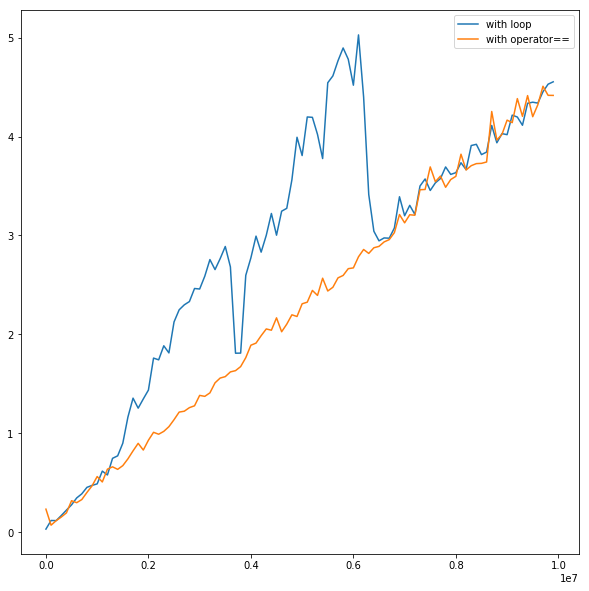

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(limits, exce_time1, label="with loop")
plt.plot(limits, exce_time2, label="with operator==")
plt.legend()
plt.show()

### Заметим, что при увеличении кол-ва данных реализация с циклом по байтам проигрывает

## Сравнение startsWith  и LIKE()

In [8]:
# With StringRef::operator==
exce_time3 = []

for limit in tqdm(limits):
    progress = client.execute_with_progress("SELECT DestCityName LIKE('aaaaaaaaaaa%') FROM ontime ESC LIMIT {} FORMAT Null".format(limit))

    started_at = datetime.now()
    rv = progress.get_result()
    now = datetime.now()
    exce_time3.append((now - started_at).total_seconds())

100%|██████████| 100/100 [03:49<00:00,  2.30s/it]


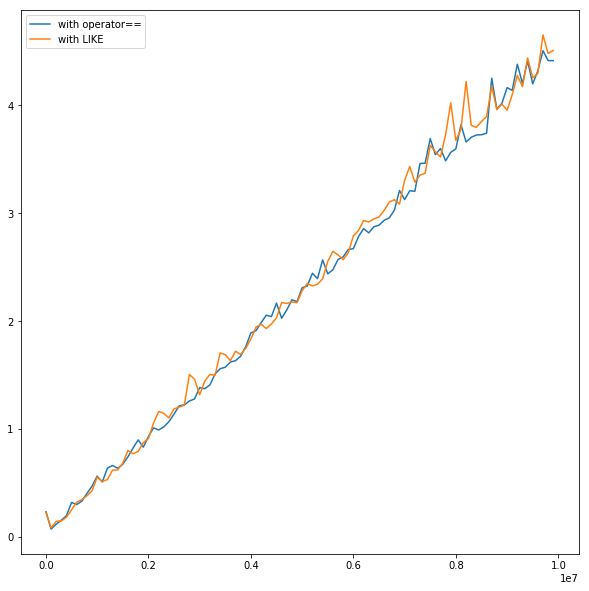

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(limits, exce_time2, label="with operator==")
plt.plot(limits, exce_time3, label="with LIKE")
plt.legend()

## Сравнение endsWith и LIKE()

In [11]:
# With StringRef::operator==
from datetime import datetime

exce_time4 = []

for limit in tqdm(limits):
    progress = client.execute_with_progress("SELECT endsWith(DestCityName, 'aaaaaaaaaaa') FROM ontime ESC LIMIT {} FORMAT Null".format(limit))

    started_at = datetime.now()
    rv = progress.get_result()
    now = datetime.now()
    exce_time4.append((now - started_at).total_seconds())

100%|██████████| 100/100 [03:52<00:00,  2.33s/it]


In [12]:
# With StringRef::operator==
exce_time5 = []

for limit in tqdm(limits):
    progress = client.execute_with_progress("SELECT DestCityName LIKE('%aaaaaaaaaaa') FROM ontime ESC LIMIT {} FORMAT Null".format(limit))

    started_at = datetime.now()
    rv = progress.get_result()
    now = datetime.now()
    exce_time5.append((now - started_at).total_seconds())

100%|██████████| 100/100 [03:52<00:00,  2.33s/it]


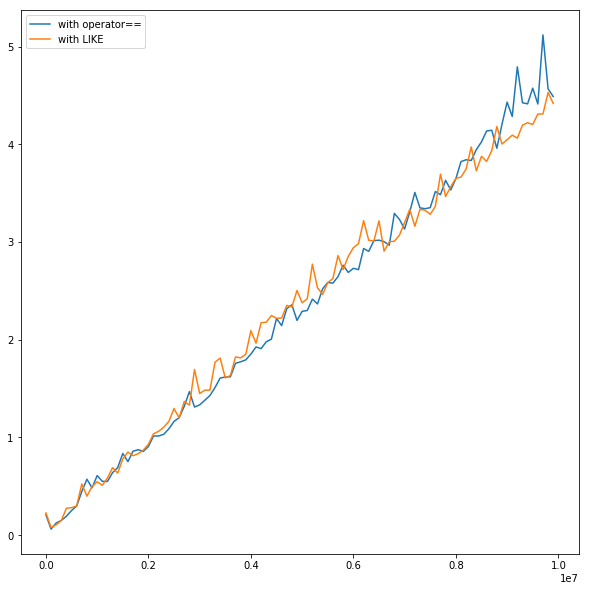

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(limits, exce_time4, label="with operator==")
plt.plot(limits, exce_time5, label="with LIKE")
plt.legend()
plt.show()

## Сравнения с substring()

In [4]:
from datetime import datetime

exce_time6 = []

for limit in tqdm(limits):
    progress = client.execute_with_progress("SELECT substring(DestCityName, 1, 11) = 'aaaaaaaaaaa' FROM ontime ESC LIMIT {} FORMAT Null".format(limit))

    started_at = datetime.now()
    rv = progress.get_result()
    now = datetime.now()
    exce_time6.append((now - started_at).total_seconds())

100%|██████████| 100/100 [03:55<00:00,  2.35s/it]


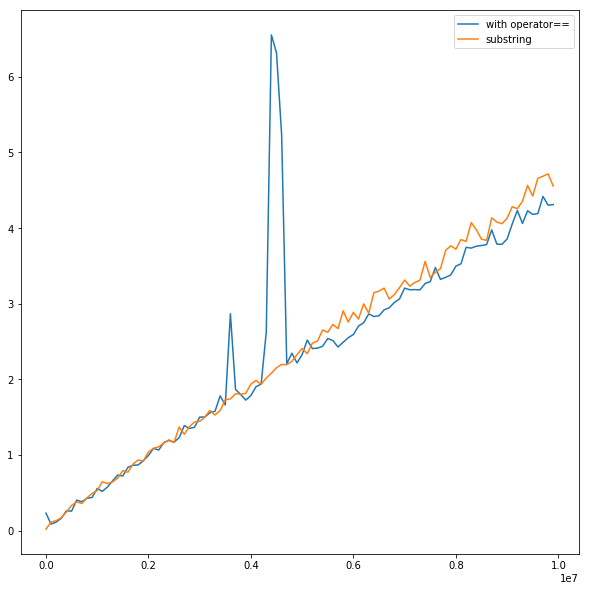

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(limits, exce_time2, label="with operator==")
plt.plot(limits, exce_time6, label="substring")
plt.legend()